<a href="https://colab.research.google.com/github/DiwashPaudel/DiwashPaudel/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#importing a neccesary package
from os import name
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading data from a file
data = pd.read_csv("/content/sample_data/CovidDataset.csv")
print(data)

     notification_date postcode lhd_2010_code         lhd_2010_name  \
0           2020-01-25     2134          X700                Sydney   
1           2020-01-25     2121          X760       Northern Sydney   
2           2020-01-25     2071          X760       Northern Sydney   
3           2020-01-27     2033          X720  South Eastern Sydney   
4           2020-03-01     2163          X710  South Western Sydney   
...                ...      ...           ...                   ...   
6357        2021-07-13     2196          X700                Sydney   
6358        2021-07-13     2198          X710  South Western Sydney   
6359        2021-07-13     2176          X710  South Western Sydney   
6360        2021-07-13     2165          X710  South Western Sydney   
6361        2021-07-13      NaN           NaN                   NaN   

      lga_code19                lga_name19  
0        11300.0               Burwood (A)  
1        16260.0            Parramatta (C)  
2        145

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362 entries, 0 to 6361
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   notification_date  6362 non-null   object 
 1   postcode           5580 non-null   object 
 2   lhd_2010_code      5573 non-null   object 
 3   lhd_2010_name      5573 non-null   object 
 4   lga_code19         5573 non-null   float64
 5   lga_name19         5573 non-null   object 
dtypes: float64(1), object(5)
memory usage: 298.3+ KB


In [5]:
# Check for missing values in each column
print("\nMissing values for each column:")
print(data.isnull().sum())


Missing values for each column:
notification_date      0
postcode             782
lhd_2010_code        789
lhd_2010_name        789
lga_code19           789
lga_name19           789
dtype: int64


In [12]:
#filling 0 in missing data or not available data
print(data.fillna(0, inplace=True))


None


In [6]:
#Checking top 7 rows from the data
data.head(7)

notification_date postcode lhd_2010_code         lhd_2010_name  lga_code19  \
0        2020-01-25     2134          X700                Sydney     11300.0   
1        2020-01-25     2121          X760       Northern Sydney     16260.0   
2        2020-01-25     2071          X760       Northern Sydney     14500.0   
3        2020-01-27     2033          X720  South Eastern Sydney     16550.0   
4        2020-03-01     2163          X710  South Western Sydney     12850.0   
5        2020-03-01     2077          X760       Northern Sydney     14000.0   
6        2020-03-02     2073          X760       Northern Sydney     14500.0   

        lga_name19  
0      Burwood (A)  
1   Parramatta (C)  
2  Ku-ring-gai (A)  
3     Randwick (C)  
4    Fairfield (C)  
5      Hornsby (A)  
6  Ku-ring-gai (A)

In [7]:
#checking last 7 rows of data
data.tail(7)

notification_date postcode lhd_2010_code         lhd_2010_name  \
6355        2021-07-13     2200          X710  South Western Sydney   
6356        2021-07-13     2165          X710  South Western Sydney   
6357        2021-07-13     2196          X700                Sydney   
6358        2021-07-13     2198          X710  South Western Sydney   
6359        2021-07-13     2176          X710  South Western Sydney   
6360        2021-07-13     2165          X710  South Western Sydney   
6361        2021-07-13      NaN           NaN                   NaN   

      lga_code19                lga_name19  
6355     11570.0  Canterbury-Bankstown (A)  
6356     12850.0             Fairfield (C)  
6357     11570.0  Canterbury-Bankstown (A)  
6358     11570.0  Canterbury-Bankstown (A)  
6359     12850.0             Fairfield (C)  
6360     12850.0             Fairfield (C)  
6361         NaN                       NaN

In [8]:
# Display summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
         lga_code19
count   5573.000000
mean   14597.837789
std     2525.897040
min    10050.000000
25%    12380.000000
50%    14900.000000
75%    16700.000000
max    18710.000000


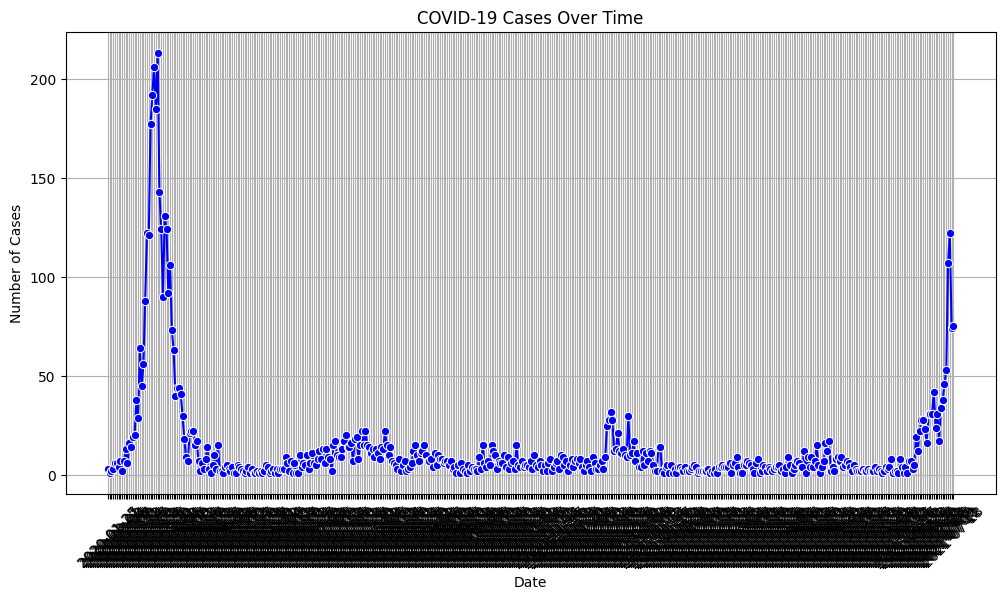

In [15]:
# Remove rows with missing notification_date (if any)
data = data.dropna(subset=['notification_date'])

# Aggregate daily case counts
agg_cases = data.groupby('notification_date').size()

# Plot COVID-19 cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=agg_cases.index, y=agg_cases.values, marker='o', color='blue')
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.title("COVID-19 Cases Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()


